In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

from matplotlib.colors import LogNorm
from sklearn import mixture

Question 1

I removed the first element of each sample which is -1.000000	139.000000

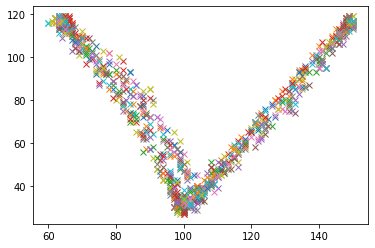

In [10]:
import glob
paths = glob.glob('/A[0-9][0-9].txt') # regular expression
files = [loadtxt(f) for f in paths]

for i in range(len(files)):
  files[i]=files[i][1:]

#Here is the modification I did to remove the first element of each sample which is
# -1.000000	139.000000 out of the draw.
for file in files:
    plt.plot(file[:,0],file[:,1],'x')
    
plt.show()



As I removed -1.000000	139.000000 this changed the GaussianMixture

In [13]:
data = np.concatenate(files)
gmm_data = mixture.GaussianMixture(n_components=2).fit(data)
covariances = np.round(gmm_data.covariances_,2)
mean = np.round(gmm_data.means_,2)
weights= np.round(gmm_data.weights_,2)

print("covariances=",',\n', covariances, ',\n', "mean=",',\n',mean, ',\n',"weights=",',\n', weights)

covariances= ,
 [[[ 197.58 -408.11]
  [-408.11  890.26]]

 [[ 346.98  602.89]
  [ 602.89 1058.46]]] ,
 mean= ,
 [[ 79.94  84.67]
 [123.75  71.11]] ,
 weights= ,
 [0.48 0.52]


In [14]:
# concatenate As
labels = gmm_data.predict(data)
plt.scatter(data[:,0],data[:,1], c=labels)

question 2

I did the same analise but using the regular expression of A instead of the normalised one Amerge.

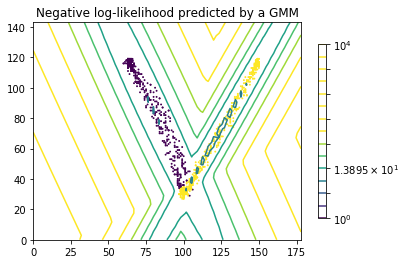

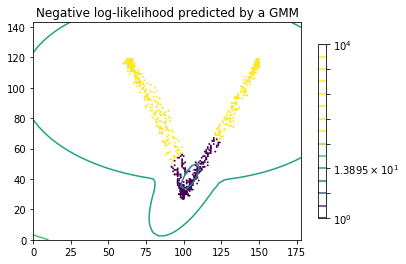

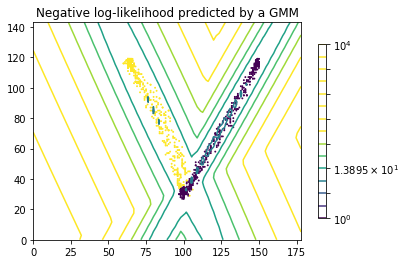

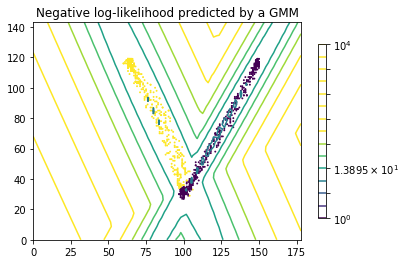

In [5]:
def plot_data(values, labels):
    # meshgrid
    x = np.linspace(0,max(data[0])+30)
    y = np.linspace(0,max(data[1]))
    X, Y = np.meshgrid(x,y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm_data.score_samples(XX)
    Z = Z.reshape(X.shape)

    # plot contour
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                     levels=np.logspace(0, 4, 15))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    plt.scatter(data[:, 0], data[:, 1],.8, c=labels)
    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')
    plt.show()


trials = 5 # tests

for k in range(1,trials+1):
    # fit new GMM
    gmm_data = mixture.GaussianMixture(n_components=2).fit(data)
    labels = gmm_data.predict(data)
    # plot
    plot_data(data, labels)

question 3

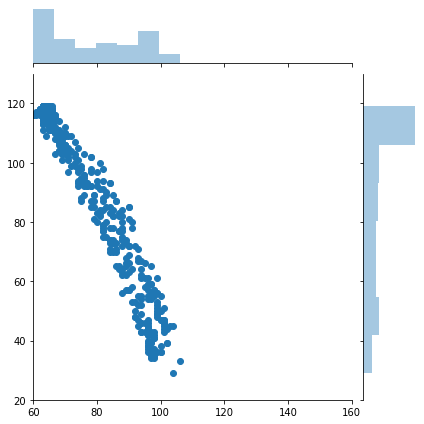

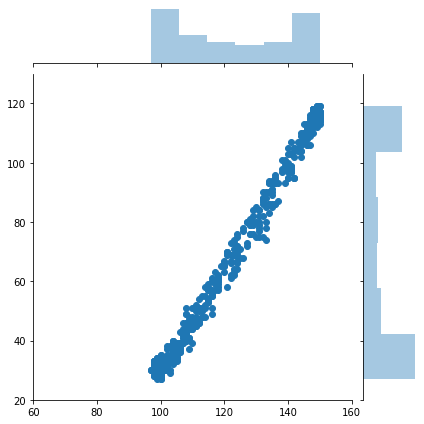

In [17]:
import scipy.stats as stats
import seaborn as sns

# prepare data
x = data[:,0] # x coordinates
y = data[:,1] # y coordinates

labels = gmm_data.predict(data)
nr_lables=np.unique(labels).size
# plot clusters singularly
for k in range(nr_lables):
    sns.jointplot(x[labels == k], y[labels == k], kind='scatter', xlim=[60,160], ylim=[20,130])



I ploted the estimated mixture of univariate
Gaussian pdfs for each marginal histogram for the x axis like this:

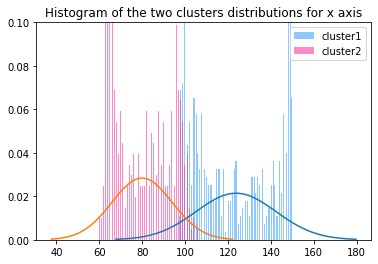

In [7]:
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    # histograms
    plt.hist(x[labels == 0], density = True, **kwargs, color='dodgerblue', label = 'cluster1')
    plt.hist(x[labels == 1], density = True, **kwargs, color='deeppink', label = 'cluster2')


    # specifications
    plt.gca().set(title='Histogram of the two clusters distributions for x axis')
    plt.gca().axes.set_ylim([0,0.1])
    plt.legend()

    mu = np.round(gmm_data.means_,2)[0,0]
    variance = np.round(gmm_data.covariances_,2)[0][0,0]
    sigma = variance**(1/2)
    x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma))

    mu = np.round(gmm_data.means_,2)[1,0]
    variance = np.round(gmm_data.covariances_,2)[1][0,0]
    sigma = variance**(1/2)
    x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma))

    plt.show()


And for the y axis:

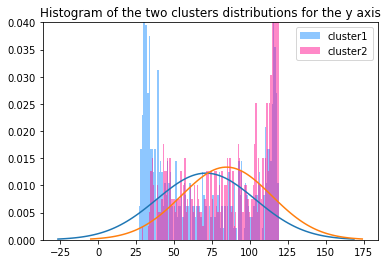

In [8]:
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    y = data[:,1]
    # histograms
    plt.hist(y[labels == 0], density = True, **kwargs, color='dodgerblue', label = 'cluster1')
    plt.hist(y[labels == 1], density = True, **kwargs, color='deeppink', label = 'cluster2')


    # specifications
    plt.gca().set(title='Histogram of the two clusters distributions for the y axis')
    plt.gca().axes.set_ylim([0,0.04])
    plt.legend()

    mu = np.round(gmm_data.means_,2)[0,1]
    variance = np.round(gmm_data.covariances_,2)[0][1,1]
    sigma = variance**(1/2)
    x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma))

    mu = np.round(gmm_data.means_,2)[1,1]
    variance = np.round(gmm_data.covariances_,2)[1][1,1]
    sigma = variance**(1/2)
    x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma))

    plt.show()

Question 5

I ploted each data point xi with the colourmap corresponding to the value P(Zi = 1|Xi).

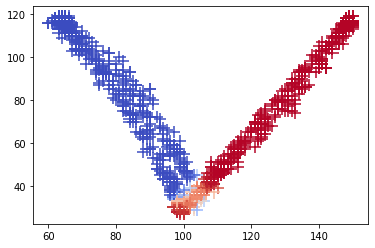

In [9]:
    from scipy.stats import multivariate_normal

    mean =np.round(gmm_data.means_,2)
    variance =np.round(gmm_data.covariances_,2)
    weights=np.round(gmm_data.weights_,2)
    p_z=weights[0]*multivariate_normal.pdf(data, mean[0], variance[0])/(weights[0]*multivariate_normal.pdf(data, mean[0], variance[0])+weights[1]*multivariate_normal.pdf(data, mean[1], variance[1]))

    plt.scatter(data[:,0], data[:,1], marker='+', s=150, linewidths=4, c=p_z, cmap=plt.cm.coolwarm)
    plt.show()

We see that in the intersection down the color is less defined as the point are in the intersection of the two clusters.